<a href="https://colab.research.google.com/github/JCaballerot/Machine_learning_program/blob/main/Supervised_models/Logistic_regression/Lab_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<h1 align=center><font size = 5>Titanic - Machine Learning from Disaster</font></h1>

---

## Tabla de Contenidos

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>
    
1. <a href="#item31">Introducción</a>  
2. <a href="#item32">Descargar y limpiar el Dataset</a>  
3. <a href="#item33">Titanic Problem</a>  
4. <a href="#item34">Análisis y tratamiento de variables</a>  
5. <a href="#item34">Regresión Logística</a>  
6. <a href="#item34">Elastic Net</a>  

</font>
</div>

## Introducción


En este laboratorio, aprenderá a usar python para construir un modelo de regresión logística.


<h3>Objetivo de este Notebook<h3>    
<h5> 1. Como construir e interpretar un modelo de regresión logística.</h5>
<h5> 2. Descargar y limpiar un Dataset </h5>
<h5> 3. Realizar los pasos necesarios previos a la etapa de modelamiento </h5>
<h5> 4. Entrenar y Testear modelo </h5>     

## Descargar y limpiar Dataset


Primero, importemos algunos módulos que necesitaremos para el análisis y construcción del modelo.

In [ ]:

# Scikit-Learn 
import sklearn
assert sklearn.__version__ >= "0.20"

# Imports comunes
import pandas as pd
import numpy as np
import os

# Configuración de tamaño de gráficos matplotlib
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore las advertencias poco útiles
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Esta es la legendaria competencia Titanic ML



El hundimiento del Titanic es uno de los naufragios más infames de la historia.

El 15 de abril de 1912, durante su viaje inaugural, el RMS Titanic, ampliamente considerado "insumergible", se hundió tras chocar con un iceberg. Desafortunadamente, no había suficientes botes salvavidas para todos a bordo, lo que resultó en la muerte de 1502 de los 2224 pasajeros y la tripulación.

Si bien hubo algún elemento de suerte involucrado en sobrevivir, parece que algunos grupos de personas tenían más probabilidades de sobrevivir que otros.

En este desafío, le pedimos que cree un modelo predictivo que responda a la pregunta: "¿Qué tipo de personas tenían más probabilidades de sobrevivir?" utilizando datos de pasajeros (es decir, nombre, edad, sexo, clase socioeconómica, etc.).

<img src="https://storage.googleapis.com/kaggle-media/welcome/video_thumbnail.jpg" alt="HTML5 Icon" style="width: 600px; height: 450px;">
<div style="text-align: center">¿Qué tipo de personas tenían más probabilidades de sobrevivir? </div>


<b>Descripción de datos</b>

El data frame de Titanic tiene 891 filas y 12 columnas.

<b>Este data frame contiene las siguientes columnas:</b>

---

* <b>Survival : </b>  Supervivencia (0 = No, 1 = Sí)
* <b>Pclass : </b>  Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* <b>Sex : </b>  Sexo 
* <b>Age : </b>  Edad en años
* <b>Sibsp : </b>  # de hermanos / cónyuges a bordo del Titanic
* <b>Parch : </b>  # de padres / hijos a bordo del Titanic

* <b>Ticket : </b>  Número de ticket

* <b>Fare : </b>  Tarifa de pasajero
* <b>Cabin : </b>  Número de cabina
* <b>Embarked : </b>  Puerto de embarque (C = Cherburgo, Q = Queenstown, S = Southampton)



---


<strong>Puede consultar este [link](https://www.kaggle.com/c/titanic/overview) para leer más sobre la fuente de datos Titanic.</strong>


## Descargar y limpiar Dataset


In [ ]:
# Cargar Data
data = pd.read_csv("titanic.csv")
data.head()

In [ ]:
data.describe().transpose()

In [ ]:
# Cargar seaborn 
import seaborn as sns
sns.set(style="whitegrid", color_codes = True)
sns.set(rc={'figure.figsize':(10,6)})


In [ ]:
# Analizando el target 
sns.countplot(x='Survived', data = data, palette = 'hls')

## Análisis de variables categóricas

In [ ]:
# Analizando variable categórica
sns.countplot(x='Sex', data = data, palette = 'hls')

In [ ]:
data.groupby(['Sex']).agg({"PassengerId":"count",
                           "Survived" :"mean"}).reset_index()

In [ ]:

table = pd.crosstab(data.Sex,data.Survived)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)

## Análisis de variables numéricas

In [ ]:
# Analizando variable numérica
sns.displot(data, x="Age",kind="kde", fill=True)

In [ ]:
sns.displot(data, x="Age", hue='Survived', kind="kde", fill=True)

In [ ]:
ax = sns.boxplot(x="Survived", y="Age", data=data, palette = 'hls')

In [ ]:
# Discretizar variable 

from sklearn.preprocessing import KBinsDiscretizer

data['Fare_cat'] = KBinsDiscretizer(n_bins = 20, 
                                   encode = 'ordinal',
                                   strategy = "quantile").fit_transform(data[['Fare']].fillna(data[['Fare']].mean()))


In [ ]:
sns.displot(data['Fare_cat'], palette = 'hls', discrete=True)

In [ ]:
aggregations = {'Survived':'mean'}
res = data.groupby('Fare_cat').agg(aggregations).reset_index()
res

In [ ]:
# Ratio del evento por tramo dela variable numérica
sns.lineplot(data=data, x="Fare_cat", y="Survived", palette = 'hls')

## Análisis multivariado

In [ ]:
sns.relplot(data=data, x="Age", y="Fare", hue="Survived")


## Tratamiento de variables

In [ ]:
#Variables 

numFeatures = ['Age','Fare','SibSp','Parch']
catFeatures = ['Pclass','Sex','Embarked']


In [ ]:
data['Pclass'] = data['Pclass'].astype('object')

In [ ]:
data[catFeatures].head()

## Encoding de variables categóricas


---

<h3>Label Encoding</h3> 

El label encoding consiste en asignar un número (por lo general entero) a cada una de las categorías de la variable categórica.

<img src="https://miro.medium.com/max/772/1*QQe-4476Oy3_dI1vhb3dDg.png" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">



---

<h3>One Hot Encoding</h3> 

El One hot encoding es un proceso que consiste en dummizar cada catgoría de la variable en una nueva variable, de esta manera las nuevas variables se activarán dependiendo del valor que tome la variable original.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTr11qA6j0WCbEYrfNoQ7QO_NpMIZus42BJwQ&usqp=CAU" alt="HTML5 Icon" style="width: 1600px; height: 1250px;">

---

<div style="text-align: center">Ejemplo de one hot Encoding </div>

<h3>Target Encoding</h3> 

El target encoding es una técnica que consiste en inputar el promedio del target a cada uno de los valores de la variable categórica.

<img src="https://lh6.googleusercontent.com/6_KrGj2k9NvcLVfmZ6HIYruAqav4rX86YU7WOhXofDGd6-98JjUPWajo0dDqmFMXv3tN0b_LOmgYLiPMCFyIWw3b7lVrCAiSboWgJ_AJ4TqHpNWUHkgIxl0xuSF9JdSXNbWG48QS" alt="HTML5 Icon" style="width: 600px; height: 450px;">

---


In [ ]:
# Tratamiento de variables categóricas

data.Sex.drop_duplicates()


In [ ]:
# Reemplazar las filas NaN por una categoría específica para missings 
for c in catFeatures:
  data[c] = data[c].replace(np.nan,'missing')

data[catFeatures].drop_duplicates()


<h3>One Hot Encoding</h3> 

In [ ]:
# One hot Encoding

from sklearn.preprocessing import OneHotEncoder

OneHotEncoder = OneHotEncoder()

dummyCols = ['Sex_dum' + str(x) for x in range(len(data['Sex'].drop_duplicates()))]
data[dummyCols] = OneHotEncoder.fit_transform(data[['Sex']]).toarray()

data[['Sex']+dummyCols].head(10)

<h3>Target Encoding</h3> 

In [ ]:
!pip install category_encoders

In [ ]:
# Target Encoding

from category_encoders import TargetEncoder
encoder = TargetEncoder()

data[[x + '_num' for x in catFeatures]] = encoder.fit_transform(data[catFeatures], data['Survived'])


In [ ]:
data.head()

In [ ]:
data[['Sex','Sex_num']].drop_duplicates()


In [ ]:
data[['Pclass','Pclass_num']].drop_duplicates()


In [ ]:
data[numFeatures]


## Tratamiento de variables numéricas




In [ ]:
# Tratamiento de outliers

p1 = data.Age.quantile(0.05)
p99 = data.Age.quantile(1)

data['Age'] = np.where(data['Age'] < p1, p1, data['Age'])
data['Age'] = np.where(data['Age'] > p99, p99, data['Age'])


In [ ]:
data.describe().transpose()

In [ ]:
# Trataiento de missings

data[[x + '_t' for x in numFeatures]] = data[numFeatures].fillna(data[numFeatures].median())


In [ ]:
data[[x + '_t' for x in numFeatures]].head(30)

In [ ]:
data.corr()

## Logistic Regression

In [ ]:
#Variables para el modelo

numFeatures = ['Age_t','Fare_t','SibSp_t','Parch_t']
catFeatures = ['Pclass_num', 'Sex_num', 'Embarked_num']

X = data[numFeatures + catFeatures]
y = data.Survived

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)



In [ ]:
# Modelo
from sklearn import linear_model

logreg = linear_model.LogisticRegression(class_weight = {0: y_train.mean(),1:1},
                                         max_iter = 1000,
                                         random_state = 123)
logreg.fit(X_train,y_train)


In [ ]:
# Analizando los parámetros del modelo

paramLogistic = pd.DataFrame({'feature': numFeatures + catFeatures,
                              'parámetro': logreg.coef_.ravel(),
                              'metod': 'logistic'})
paramLogistic


In [ ]:
logreg.intercept_

In [ ]:
# Usando el modelo para predecir

X_train['probability'] = logreg.predict_proba(X_train[numFeatures + catFeatures])[:,1]
X_test['probability']  = logreg.predict_proba(X_test[numFeatures + catFeatures])[:,1]

X_train['prediction'] = logreg.predict(X_train[numFeatures + catFeatures])
X_test['prediction']  = logreg.predict(X_test[numFeatures + catFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test


In [ ]:
X_train.probability.describe()

In [ ]:
sns.displot(X_test, x="probability", kind="kde", fill=True)

In [ ]:
sns.displot(X_test, x="probability", hue = 'Survived', kind="kde", fill=True)

## Bondad de Ajuste

In [ ]:
from sklearn.metrics import *

In [ ]:
def plot_roc_curve(y_true, y_score, filepath=None, line_width=2, width=12,
                   height=10, title=None, colors=("#FF0000", "#000000")):
    """
    Saves a ROC curve in a file or shows it on screen.
    :param y_true: actual values of the response (list|np.array)
    :param y_score: predicted scores (list|np.array)
    :param filepath: if given, the ROC curve is saved in the desired filepath. It should point to a png file in an
    existing directory. If not specified, the curve is only shown (str)
    :param line_width: number indicating line width (float)
    :param width: number indicating the width of saved plot (float)
    :param height: number indicating the height of saved plot (float)
    :param title: if given, title to add to the top side of the plot (str)
    :param colors: color specification for ROC curve and diagonal respectively (tuple of str)
    :return: None
    """
    fpr, tpr, _ = roc_curve(y_true=y_true, y_score=y_score)
    gini = auc(fpr, tpr) * 2 - 1

    sns.set_style("whitegrid")
    fig = plt.figure(figsize=(width, height))
    major_ticks = np.arange(0, 1.1, 0.1)
    minor_ticks = np.arange(0.05, 1, 0.1)
    ax = fig.add_subplot(1, 1, 1)
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(minor_ticks, minor=True)
    ax.grid(which="both", axis="both")
    ax.grid(which="minor", alpha=0.2)
    ax.grid(which="major", alpha=0.5)
    ax.tick_params(which="major", direction="out", length=5)
    plt.plot(fpr, tpr, color=colors[0], lw=line_width,
                   label="ROC curve (gini = {:.2f})".format(gini))
    plt.plot([0, 1], [0, 1], color=colors[1], lw=line_width, linestyle='--')
    plt.xlim([-0.001, 1.001])
    plt.ylim([-0.001, 1.001])
    plt.xlabel("False positive rate", fontsize=15)
    plt.ylabel("True positive rate", fontsize=15)
    if title:
        plt.title(title, fontsize=30, loc="left")
    plt.legend(loc="lower right", frameon=True, fontsize="large",
                     fancybox=True)
    plt.tight_layout()
    if filepath:
        plt.savefig(filepath, dpi=200)
        plt.close()
    else:
        plt.show()

In [ ]:
plot_roc_curve(y_test, X_test.probability, width=6, height=5)

In [ ]:
# AUC

print('TRAIN AUC: %f' %(roc_auc_score(y_train, X_train.probability)))
print('TEST AUC: %f' %(roc_auc_score(y_test, X_test.probability)))


In [ ]:
# GINI

print('TRAIN GINI: %f' %(roc_auc_score(y_train, X_train.probability)*2-1))
print('TEST GINI: %f' %(roc_auc_score(y_test, X_test.probability)*2-1))


In [ ]:
# Tablas cruzadas

pd.crosstab(X_test.prediction, y_test, margins=True, margins_name="Total")

In [ ]:
pd.crosstab(X_test.prediction, y_test, margins=True, margins_name="Total", normalize=True)

In [ ]:
# ACCURACY

print('TRAIN ACCURACY: %f' %(accuracy_score(y_train, X_train.prediction)))
print('TEST ACCURACY: %f' %(accuracy_score(y_test, X_test.prediction)))


In [ ]:
# PRECISION

print('TRAIN PRECISION: %f' %(precision_score(y_train, X_train.prediction)))
print('TEST PRECISION: %f' %(precision_score(y_test, X_test.prediction)))


In [ ]:
# RECALL

print('TRAIN RECALL: %f' %(recall_score(y_train, X_train.prediction)))
print('TEST RECALL: %f' %(recall_score(y_test, X_test.prediction)))


In [ ]:
# F1

print('TRAIN F1: %f' %(f1_score(y_train, X_train.prediction)))
print('TEST F1: %f' %(f1_score(y_test, X_test.prediction)))


In [ ]:
#Resumen de todas las métricas del modelo

metricsLogisitc = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'logistic_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'logistic_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsLogisitc

<h3>Análisis de Predicción</h3> 

In [ ]:

from sklearn.preprocessing import KBinsDiscretizer

X_test['probability_rank'] = KBinsDiscretizer(n_bins = 8, 
                                   encode='ordinal',
                                   strategy = "quantile").fit_transform(X_test[['probability']])


In [ ]:
aggregations = {'prediction':'count','probability':'max','Survived':'mean'}
res = X_test.groupby('probability_rank').agg(aggregations).reset_index()
res


In [ ]:

pddf1 = pd.DataFrame({'probability_rank':X_test.probability_rank,
                      'value':X_test.probability,
                     'type': 'probability_mean'})

pddf2 = pd.DataFrame({'probability_rank':X_test.probability_rank,
                      'value':X_test.Survived,
                     'type': 'Survived_rate'})

pddf = pddf1.append(pddf2)
pddf

In [ ]:
# Ratio del evento por tramo dela variable numérica

sns.lineplot(data=pddf, x="probability_rank", y="value", hue="type", markers=True, dashes=False)


## Elastic Net

In [ ]:
#Variables para el modelo

numFeatures = ['Age_t','Fare_t','SibSp_t','Parch_t']
catFeatures = ['Pclass_num','Sex_num','Embarked_num']

X = data[numFeatures + catFeatures]
y = data.Survived

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:
# Modelo
from sklearn.linear_model import LogisticRegression

eltNet = LogisticRegression(penalty = 'elasticnet',
                            class_weight = {0:y_train.mean(), 1:1},
                            solver = 'saga',
                            C = 10, 
                            l1_ratio = 0.5,
                            max_iter = 1000,
                            random_state = 123)

eltNet.fit(X_train, y_train)

In [ ]:
# Analizando los parámetros del modelo

paramElasticNet = pd.DataFrame({'feature': numFeatures + catFeatures,
                                'parámetro': eltNet.coef_.ravel(),
                                'metod': 'elastic_net'})
paramElasticNet

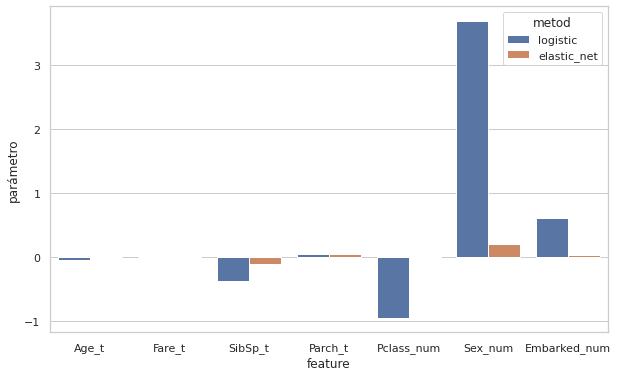

In [ ]:
resumen = paramLogistic.append(paramElasticNet)

sns.barplot(x='feature', y='parámetro', hue='metod', data=resumen)


In [ ]:
# Usando el modelo para predecir

X_train['probability'] = eltNet.predict_proba(X_train[numFeatures + catFeatures])[:,1]
X_test['probability']  = eltNet.predict_proba(X_test[numFeatures + catFeatures])[:,1]

X_train['prediction'] = eltNet.predict(X_train[numFeatures + catFeatures])
X_test['prediction']  = eltNet.predict(X_test[numFeatures + catFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test


In [ ]:
#Resumen de todas las métricas del modelo

metricsElasticNet = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'ElasticNet_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'ElasticNet_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsElasticNet

In [ ]:
pdRes = pd.merge(metricsLogisitc, metricsElasticNet, on = 'metric', how='left')
pdRes

## Naive Bayes

In [ ]:
# Cargar Data
import pandas as pd
data = pd.read_csv("titanic.csv")
data.head()

In [ ]:
#Variables 

numFeatures = ['Age','Fare','SibSp','Parch']
catFeatures = ['Pclass','Sex','Embarked']

In [ ]:
data[[x + '_t' for x in numFeatures]] = data[numFeatures].fillna(data[numFeatures].median())

In [ ]:
#Variables para el modelo

numFeatures = ['Age_t','Fare_t','SibSp_t','Parch_t']

X = data[numFeatures]
y = data.Survived

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:
X_train.corr()

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)


In [ ]:
gnb.predict_proba(X_train[numFeatures])

In [ ]:
# Usando el modelo para predecir

X_train['probability'] = gnb.predict_proba(X_train[numFeatures])[:,1]
X_test['probability']  = gnb.predict_proba(X_test[numFeatures])[:,1]

X_train['prediction'] = gnb.predict(X_train[numFeatures])
X_test['prediction']  = gnb.predict(X_test[numFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test

In [ ]:
#Resumen de todas las métricas del modelo

metricsgnb = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'gnb_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'gnb_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsgnb     

In [ ]:
pdRes = pd.merge(pdRes, metricsgnb, on = 'metric', how='left')
pdRes

## Decision Tree

In [ ]:
#Variables para el modelo

numFeatures = ['Age_t','Fare_t','SibSp_t','Parch_t']
catFeatures = ['Pclass_num','Sex_num','Embarked_num']

X = data[numFeatures + catFeatures]
y = data.Survived

In [ ]:
# Muestreo de data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 123)

In [ ]:
# Configuramos el modelo

from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth = 5,
                               min_samples_leaf = int(round(y_train.shape[0]*0.05,0)),
                               class_weight = {0:y_train.mean(),1:1},
                               random_state = 123)
dtree = dtree.fit(X_train, y_train)
    
dtree

In [ ]:
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

dot_data = export_graphviz(dtree,
                           feature_names = numFeatures + catFeatures,
                           filled = True,
                           rounded = True,
                           special_characters = True)

graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')
print(graph)


In [ ]:
# Usando el modelo para predecir

X_train['probability'] = dtree.predict_proba(X_train[numFeatures + catFeatures])[:,1]
X_test['probability']  = dtree.predict_proba(X_test[numFeatures + catFeatures])[:,1]

X_train['prediction'] = dtree.predict(X_train[numFeatures + catFeatures])
X_test['prediction']  = dtree.predict(X_test[numFeatures + catFeatures])

X_train['Survived'] = y_train
X_test['Survived'] = y_test

In [ ]:
#Resumen de todas las métricas del modelo

metricsDtree = pd.DataFrame({'metric':['AUC','Gini','Accuracy','Precision','Recall','F1-score'],
                                'dTree_train':[roc_auc_score(y_train, X_train.probability),
                                        (roc_auc_score(y_train, X_train.probability)*2-1),
                                        accuracy_score(y_train, X_train.prediction),
                                        precision_score(y_train, X_train.prediction),
                                        recall_score(y_train, X_train.prediction),
                                        f1_score(y_train, X_train.prediction)],

                                'dTree_test':[roc_auc_score(y_test, X_test.probability),
                                        (roc_auc_score(y_test, X_test.probability)*2-1),
                                        accuracy_score(y_test, X_test.prediction),
                                        precision_score(y_test, X_test.prediction),
                                        recall_score(y_test, X_test.prediction),
                                        f1_score(y_test, X_test.prediction)]})

metricsDtree                                 

In [ ]:
pd.merge(metricsLogisitc, metricsDtree, on = 'metric', how='left')

### Gracias por completar este laboratorio!

---

